In [1]:
import numpy as np
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('./diabetes_012_health_indicators_BRFSS2015.csv')

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df['Diabetes_012'].astype(str), test_size=0.2, random_state=42)
dict = {'1.0': 600000, '2.0': 400000}
smote = SMOTE(sampling_strategy=dict, random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

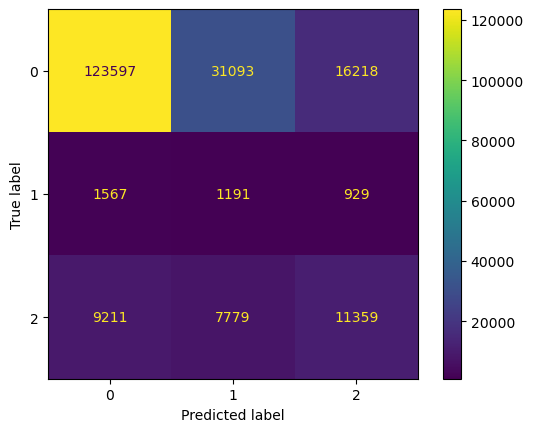

In [3]:
cols = X_train.shape[1]
hidden = (int)((cols + 1) / 2)
clf = MLPClassifier(hidden_layer_sizes=(hidden,), activation='relu', solver='adam', alpha=1e-4, max_iter=1000)
clf.fit(X_smote, y_smote)
y_pred = clf.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [4]:
print("Report for Training:")
print(classification_report(y_train, y_pred))
y_pred = clf.predict(X_test)
print("Report for Testing:")
print(classification_report(y_test, y_pred))

Report for Training:
              precision    recall  f1-score   support

         0.0       0.92      0.72      0.81    170908
         1.0       0.03      0.32      0.05      3687
         2.0       0.40      0.40      0.40     28349

    accuracy                           0.67    202944
   macro avg       0.45      0.48      0.42    202944
weighted avg       0.83      0.67      0.74    202944

Report for Testing:
              precision    recall  f1-score   support

         0.0       0.92      0.72      0.81     42795
         1.0       0.03      0.34      0.06       944
         2.0       0.40      0.41      0.40      6997

    accuracy                           0.67     50736
   macro avg       0.45      0.49      0.42     50736
weighted avg       0.84      0.67      0.74     50736



In [ ]:
params = {'solver': ['sgd', 'adam'],
              'activation': ['relu', 'logistic', 'tanh'],
              'alpha': [1e-5, 5e-5, 1e-4, 5e-4],
              'hidden_layer_sizes': [((cols + 1)/2,), ((cols + 3)/2,), (100,)],
              'learning_rate_init': [5e-4, 0.001, 0.005, 0.01],
              'max_iter': [1000]}

clf = MLPClassifier(random_state=42)
grid = GridSearchCV(estimator=clf, param_grid=params, scoring='f1_weighted')
grid.fit(X_smote, y_smote)
print(grid.best_params_)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/anaconda3/lib/pyth